In [1]:
import pandas as pd

In [2]:
df_sale = pd.read_csv("data/sales.csv")

In [3]:
df_shop = pd.read_csv("data/shops.csv")

In [4]:
df_product = pd.read_csv("data/products.csv")

In [5]:
df_sale.head()

,Sale ID,Date,Shop,Product,Quantity,Unit price
0,S000000000,2021-02-04,shop_0,TAB_0,1.0,210.0
1,S000000001,2021-02-03,shop_1,TAB_1,1.0,300.0
2,S000000002,2021-02-02,shop_2,CHA_2,2.0,60.0
3,S000000003,2021-02-01,shop_3,BED_3,1.0,150.0
4,S000000004,2021-01-31,shop_4,BED_4,3.0,300.0


In [6]:
df_shop.head()

,Shop ID,City,State or region,Country,Shop size
0,shop_0,New York,New York,USA,big
1,shop_1,Los Angeles,California,USA,medium
2,shop_2,San Diego,California,USA,medium
3,shop_3,San Jose,California,USA,medium
4,shop_4,San Francisco,California,USA,small


In [7]:
df_product.head()

,Product,Category,Sub category,Size,Purchase price,Color,Brand
0,TAB_0,Furniture,Table,1m80,190.0,black,Basic
1,TAB_1,Furniture,Table,2m40,280.0,white,Mega
2,CHA_2,Furniture,Chair,NaN,48.0,blue,Basic
3,BED_3,Furniture,Bed,Single,127.0,red,Mega
4,BED_4,Furniture,Bed,Double,252.0,brown,Basic


In [8]:
# Atoti 

In [9]:
import atoti as tt

session = tt.create_session()

In [10]:
sales_store = session.read_csv("data/sales.csv", keys=["Sale ID"])

In [11]:
product_store = session.read_csv("data/products.csv", keys=["Product"])

In [12]:
shop_store = session.read_csv("data/shops.csv", keys=["Shop ID"])

In [13]:
sales_store.head()

,Date,Shop,Product,Quantity,Unit price
Sale ID,,,,,
S000000000,2021-02-04,shop_0,TAB_0,1.0,210.0
S000000001,2021-02-03,shop_1,TAB_1,1.0,300.0
S000000002,2021-02-02,shop_2,CHA_2,2.0,60.0
S000000003,2021-02-01,shop_3,BED_3,1.0,150.0
S000000004,2021-01-31,shop_4,BED_4,3.0,300.0


In [14]:
product_store.head()

,Category,Sub category,Size,Purchase price,Color,Brand
Product,,,,,,
TAB_0,Furniture,Table,1m80,190.0,black,Basic
TAB_1,Furniture,Table,2m40,280.0,white,Mega
CHA_2,Furniture,Chair,N/A,48.0,blue,Basic
BED_3,Furniture,Bed,Single,127.0,red,Mega
BED_4,Furniture,Bed,Double,252.0,brown,Basic


In [15]:
shop_store.head()

,City,State or region,Country,Shop size
Shop ID,,,,
shop_0,New York,New York,USA,big
shop_1,Los Angeles,California,USA,medium
shop_2,San Diego,California,USA,medium
shop_3,San Jose,California,USA,medium
shop_4,San Francisco,California,USA,small


In [16]:
sales_store.join(product_store, mapping={"Product": "Product"})
# .join(shop_store, mapping={"Shop": "Shop ID"})

In [17]:
sales_store.join(shop_store, mapping={"Shop": "Shop ID"})

In [18]:
# classified_products_store.join(
#     purchase_prices_store, mapping={"ProductId": "ProductId"}
# )

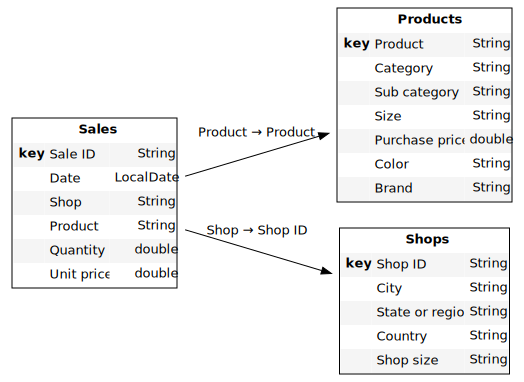

In [19]:
session.stores.schema

In [20]:
cube = session.create_cube(sales_store, mode="manual")

In [21]:
h = cube.hierarchies
h

Hierarchies()

In [22]:
l = cube.levels
l

Levels()

In [23]:
m = cube.measures
m

Measures()

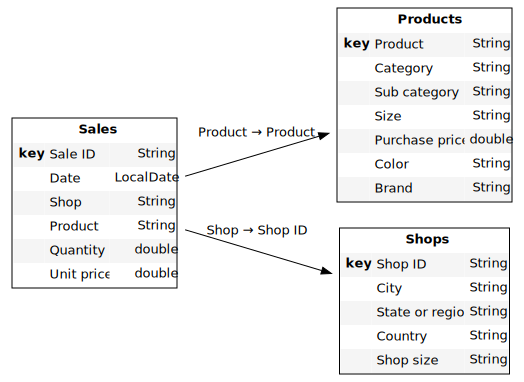

In [24]:
cube.schema

In [41]:
h["Product"] = [sales_store["Product"]]
h["Sale"] = [sales_store["Sale ID"]]
h["Shop"] = [sales_store["Shop"]]
h["Date"] = [sales_store["Date"]]
# h["Product"] = [product_store["Product"]]

In [26]:
m["Max price"] = tt.agg.max(sales_store["Unit price"])
m["Quantity.SUM"] = tt.agg.sum(sales_store["Quantity"])

In [30]:
m["Quantity.MEAN"] = tt.agg.mean(sales_store["Quantity"])

In [34]:
m["Price.MEAN"] = tt.agg.mean(sales_store["Unit price"])
m["Price.SUM"] = tt.agg.sum(sales_store["Unit price"])

In [42]:
h

Hierarchies()

In [36]:
m

Measures()

In [37]:
# Some query 

In [38]:
cube.query(m["Quantity.SUM"], levels=l["Shop"])

,Quantity.SUM
Shop,
shop_0,202.00
shop_1,202.00
shop_10,203.00
shop_11,203.00
shop_12,201.00
shop_13,202.00
shop_14,202.00
shop_15,202.00
shop_16,201.00


In [39]:
cube.query(
    m["Quantity.SUM"],
    condition=l["Shop"] == "shop_0",
)

,Quantity.SUM
0,202.00


In [43]:
cube.query(m["Quantity.SUM"], levels=[l["Date"], l["Product"]])

Quantity.SUM
Date       Product             
2021-01-06 BED_24          8.00
           BED_25          4.00
           BED_26          6.00
           BED_27          4.00
           BED_3           2.00
...                         ...
2021-02-04 TSH_52          6.00
           TSH_53          4.00
           TSH_7           3.00
           TSH_8           5.00
           TSH_9           3.00

[1830 rows x 1 columns]

In [44]:
cube.query(
    m["Quantity.SUM"],
    levels=[l["Date"], l["Product"]],
    condition=l["Shop"] == "shop_0",
)

Quantity.SUM
Date       Product             
2021-01-15 BED_24          1.00
           BED_26          1.00
           BED_3           1.00
           BED_4           1.00
           BED_46          1.00
...                         ...
2021-02-04 TSH_51          2.00
           TSH_52          1.00
           TSH_53          1.00
           TSH_7           1.00
           TSH_9           1.00

[125 rows x 1 columns]

In [47]:
cube.query(
    m["Quantity.SUM"],
    levels=[l["Date"], l["Product"]],
    condition=((l["Shop"] == "shop_0") & (l["Date"] == "2021-02-04")),
)

Quantity.SUM
Date       Product             
2021-02-04 BED_25          2.00
           BED_27          1.00
           BED_3           1.00
           BED_45          4.00
           BED_46          1.00
           BED_47          1.00
           BED_48          2.00
           BED_5           2.00
           CHA_23          1.00
           CHA_44          1.00
           HOO_13          2.00
           HOO_33          1.00
           HOO_35          1.00
           HOO_54          4.00
           HOO_55          1.00
           HOO_56          1.00
           SHO_15          3.00
           SHO_17          1.00
           SHO_19          4.00
           SHO_37          1.00
           SHO_39          2.00
           SHO_40          2.00
           SHO_41          3.00
           SHO_57          2.00
           SHO_58          1.00
           SHO_59          1.00
           SHO_60          2.00
           TAB_0           1.00
           TAB_1           1.00
           TAB_21          1.00
           TAB_42          1.00
           TAB_43          1.00
           TSH_11          1.00
           TSH_29          1.00
           TSH_31          2.00
           TSH_49          1.00
           TSH_50          3.00
           TSH_51          2.00
           TSH_52          1.00
           TSH_53          1.00
           TSH_7           1.00
           TSH_9           1.00

In [45]:
?cube.query

Signature:
cube.query(
    *measures: '_Measure',
    condition: 'Optional[Union[LevelCondition, MultiCondition, LevelIsInCondition, HierarchyIsInCondition]]' = None,
    include_totals: 'bool' = False,
    levels: 'Optional[Union[_Level, Sequence[_Level]]]' = None,
    mode: "Literal[('pretty', 'raw')]" = 'pretty',
    scenario: 'str' = 'Base',
    timeout: 'int' = 30,
) -> 'Union[QueryResult, pd.DataFrame]'
Docstring:
Query the cube to retrieve the value of the passed measures on the given levels.

In JupyterLab with the :mod:`atoti-jupyterlab <atoti_jupyterlab>` plugin installed, query results can be converted to interactive widgets with the :guilabel:`Convert to Widget Below` action available in the command palette or by right clicking on the representation of the returned Dataframe.

Args:
    measures: The measures to query.
        If ``None``, all the measures are queried.
    condition: The filtering condition.
        Only conditions on level equality with a string are suppor